In [1]:
import torch.nn as nn
from torch.optim import lr_scheduler
import torch
import numpy as np

In [2]:

from cifar_dl_dt_helper import get_dataloaders_sizes_classes
from CifarModel1 import Cifar_model1
from pytorch_training2 import Pytorch_training_helper


In [3]:
from pytorch_model_helper import get_parameters_to_vectors,new_theta,get_best_model_details_after_training

In [4]:
data_dir = './data/cifar10'

In [5]:
cifar_model = {}
grad_norm_per_epoch ={}
train_losses ={}
val_losses = {}
train_acc = {}
val_acc ={}
model_wts_epoch={}
sensitivity ={}
optimizer ={}
exp_lr_scheduler = {}
result_folder = "batch_based_problems_final_eps_25/"

batch_sizes = [2**4,2**6,2**8,2**10,2**12]

best_model_train_loss =[]
best_model_test_loss =[]

best_model_train_acc =[]
best_model_test_acc =[]

best_model_sensitivity = []

# batch_sizes = [64,1024]
print(batch_sizes)
num_epochs = 25


for batch_size in batch_sizes:
    dataloaders,dataset_sizes,class_names = get_dataloaders_sizes_classes(data_dir,batch_size)
    py_train_helper = Pytorch_training_helper(dataloaders,dataset_sizes,batch_size,result_folder,
                                          flag_grad=1,
                                          flag_weights=1,
                                          flag_frobenius_norm=1)
    
    cifar_model[batch_size]= Cifar_model1()
    step1 = 0.0004   
    gamma_lr_scheduler1 = 0.1
    criterion1 = nn.CrossEntropyLoss()
    weight_decay1 = 1e-4

    # optimizer = optim.SGD(model.parameters(), lr=0.001)
    optimizer[batch_size] = torch.optim.Adam(cifar_model[batch_size].parameters(),lr = step1,weight_decay=weight_decay1)

    exp_lr_scheduler[batch_size] = lr_scheduler.StepLR(
        optimizer[batch_size], step_size=10, gamma=gamma_lr_scheduler1
    )
    cifar_model[batch_size],grad_norm_per_epoch[batch_size],train_losses[batch_size],val_losses[batch_size],train_acc[batch_size],val_acc[batch_size],model_wts_epoch[batch_size],sensitivity[batch_size] = py_train_helper.train_model(cifar_model[batch_size],criterion1,optimizer[batch_size],exp_lr_scheduler[batch_size],str(batch_size)+"_model_",num_epochs=num_epochs)
    grad_norm,train_loss,val_loss,tr_acc,vl_acc,mdl_wts_eph,sensi = get_best_model_details_after_training(grad_norm_per_epoch[batch_size],train_losses[batch_size],val_losses[batch_size],train_acc[batch_size],val_acc[batch_size],model_wts_epoch[batch_size],sensitivity[batch_size] )
    
    best_model_train_loss.append(train_loss)
    best_model_test_loss.append(val_loss)

    best_model_train_acc.append(tr_acc)
    best_model_test_acc.append(vl_acc)
    
    best_model_sensitivity.append(sensi)
    

[16, 64, 256, 1024, 4096]
Training started:
Phase: train Epoch: 1/25 Loss: 2.0836 Acc: 0.3769        89
Phase: validation   Epoch: 1/25 Loss: 1.9808 Acc: 0.4833        
Phase: train Epoch: 2/25 Loss: 2.0026 Acc: 0.4581        47
Phase: validation   Epoch: 2/25 Loss: 1.9454 Acc: 0.5194        
Phase: train Epoch: 3/25 Loss: 1.9796 Acc: 0.4814        23
Phase: validation   Epoch: 3/25 Loss: 1.9295 Acc: 0.5324        
Phase: train Epoch: 4/25 Loss: 1.9660 Acc: 0.4935        51
Phase: validation   Epoch: 4/25 Loss: 1.9186 Acc: 0.5412        
Phase: train Epoch: 5/25 Loss: 1.9575 Acc: 0.5014        98
Phase: validation   Epoch: 5/25 Loss: 1.9230 Acc: 0.5375        
Phase: train Epoch: 6/25 Loss: 1.9480 Acc: 0.5121        99
Phase: validation   Epoch: 6/25 Loss: 1.9103 Acc: 0.5499        
Phase: train Epoch: 7/25 Loss: 1.9431 Acc: 0.5171        35
Phase: validation   Epoch: 7/25 Loss: 1.8986 Acc: 0.5622        
Phase: train Epoch: 8/25 Loss: 1.9342 Acc: 0.5266        92
Phase: validation   E

Phase: validation   Epoch: 14/25 Loss: 1.9018 Acc: 0.5710        
Phase: train Epoch: 15/25 Loss: 1.9366 Acc: 0.5329        
Phase: validation   Epoch: 15/25 Loss: 1.9012 Acc: 0.5712        
Phase: train Epoch: 16/25 Loss: 1.9364 Acc: 0.5344        
Phase: validation   Epoch: 16/25 Loss: 1.9006 Acc: 0.5704        
Phase: train Epoch: 17/25 Loss: 1.9354 Acc: 0.5352        
Phase: validation   Epoch: 17/25 Loss: 1.8994 Acc: 0.5717        
Phase: train Epoch: 18/25 Loss: 1.9325 Acc: 0.5379        
Phase: validation   Epoch: 18/25 Loss: 1.8993 Acc: 0.5725        
Phase: train Epoch: 19/25 Loss: 1.9344 Acc: 0.5347        
Phase: validation   Epoch: 19/25 Loss: 1.8983 Acc: 0.5735        
Phase: train Epoch: 20/25 Loss: 1.9326 Acc: 0.5370        
Phase: validation   Epoch: 20/25 Loss: 1.8980 Acc: 0.5735        
Phase: train Epoch: 21/25 Loss: 1.9328 Acc: 0.5384        
Phase: validation   Epoch: 21/25 Loss: 1.8976 Acc: 0.5743        
Phase: train Epoch: 22/25 Loss: 1.9326 Acc: 0.5367        


In [6]:
alpha = np.linspace(-2.0, 2.0, num=21)
alpha

array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
        0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ])

In [7]:
batch64_model = cifar_model[64]
batch1024_model = cifar_model[1024]

In [8]:
batch64_params_vectors = get_parameters_to_vectors(batch64_model)
batch1024_params_vectors = get_parameters_to_vectors(batch1024_model)

In [9]:
alpha_theta_arr = {}

for i in alpha:
    alpha_theta_arr[i] = new_theta(batch64_params_vectors,batch1024_params_vectors,i)

In [10]:
new_model_with_new_theta_weights={}
train_loss_alpha ={}
test_loss_alpha ={}
train_acc_alpha = {}
test_acc_alpha = {}

bat_siz = 64
dataloaders,dataset_sizes,class_names = get_dataloaders_sizes_classes(data_dir,bat_siz)
py_train_helper = Pytorch_training_helper(dataloaders,dataset_sizes,bat_siz,result_folder,
                                          flag_grad=0,
                                          flag_weights=0,
                                          flag_frobenius_norm=0)

criterion = nn.CrossEntropyLoss()
for i in alpha:
    new_model = Cifar_model1()
    torch.nn.utils.vector_to_parameters(alpha_theta_arr[i],new_model.parameters())
    print("Alpha:", i)
    new_model_with_new_theta_weights[i]  = new_model
    train_loss,test_loss,train_acc,test_acc = py_train_helper.test_model(new_model,criterion)
    print("train_loss,test_loss,train_acc,test_acc : ",train_loss,test_loss,train_acc,test_acc)
    train_loss_alpha[i] = train_loss
    test_loss_alpha[i] = test_loss
    train_acc_alpha[i] = train_acc
    test_acc_alpha[i] = test_acc
    
    

Alpha: -2.0
train_loss,test_loss,train_acc,test_acc :  2.233403549194336 2.2211462226867678 0.2272 0.2395
Alpha: -1.8
train_loss,test_loss,train_acc,test_acc :  2.229231651382446 2.215597749710083 0.23124 0.2449
Alpha: -1.6
train_loss,test_loss,train_acc,test_acc :  2.224952421340942 2.2085725914001464 0.23494 0.2514
Alpha: -1.4
train_loss,test_loss,train_acc,test_acc :  2.2160417205810545 2.1985253410339354 0.24392 0.2612
Alpha: -1.2
train_loss,test_loss,train_acc,test_acc :  2.203301053771973 2.185650756072998 0.2562 0.2742
Alpha: -1.0
train_loss,test_loss,train_acc,test_acc :  2.187608462677002 2.1670460437774657 0.27146 0.2927
Alpha: -0.7999999999999998
train_loss,test_loss,train_acc,test_acc :  2.1666679570007323 2.143142053222656 0.29154 0.3165
Alpha: -0.5999999999999999
train_loss,test_loss,train_acc,test_acc :  2.1324244467163087 2.105173945236206 0.32506 0.3522
Alpha: -0.3999999999999999
train_loss,test_loss,train_acc,test_acc :  2.0812166665649414 2.0489912845611573 0.37566 0

In [11]:
# bat_siz = 64
# dataloaders,dataset_sizes,class_names = get_dataloaders_sizes_classes(data_dir,bat_siz)
# py_train_helper = Pytorch_training_helper(dataloaders,dataset_sizes,bat_siz,result_folder,
#                                           flag_grad=0,
#                                           flag_weights=0,
#                                           flag_frobenius_norm=0)


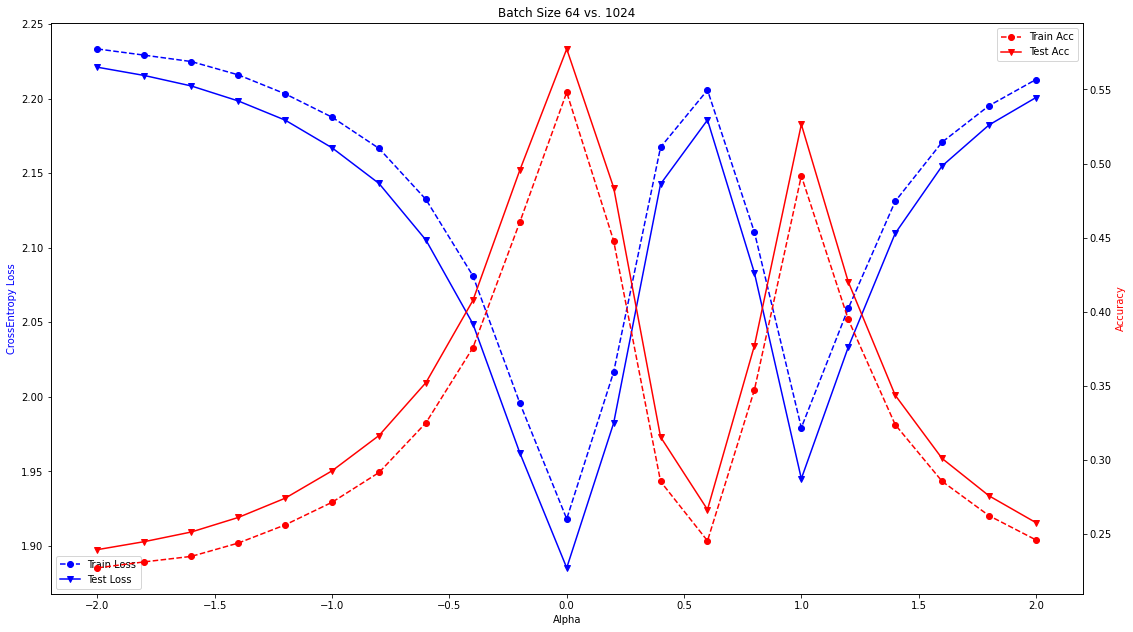

In [12]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(alpha,train_loss_alpha.values(),color="Blue",linestyle='dashed', marker="o")
ax.plot(alpha,test_loss_alpha.values(),color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="lower left")
ax.set_xlabel("Alpha",color="Black")
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("Batch Size 64 vs. 1024",color = "Black")


ax2=ax.twinx()
ax2.plot(alpha,train_acc_alpha.values(),color="red",linestyle='dashed', marker="o")
ax2.plot(alpha,test_acc_alpha.values(),color="red", marker="v")
ax2.set_xlabel("Alpha",color="Black")
ax2.set_ylabel("Accuracy",color = "red")
ax2.legend(['Train Acc','Test Acc'],loc="upper right")

plt.show()
fig.savefig(result_folder+'HW3_2_batch_64_1024.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [13]:
# best_model_train_loss =[]
# best_model_test_loss =[]

# best_model_train_acc =[]
# best_model_test_acc =[]

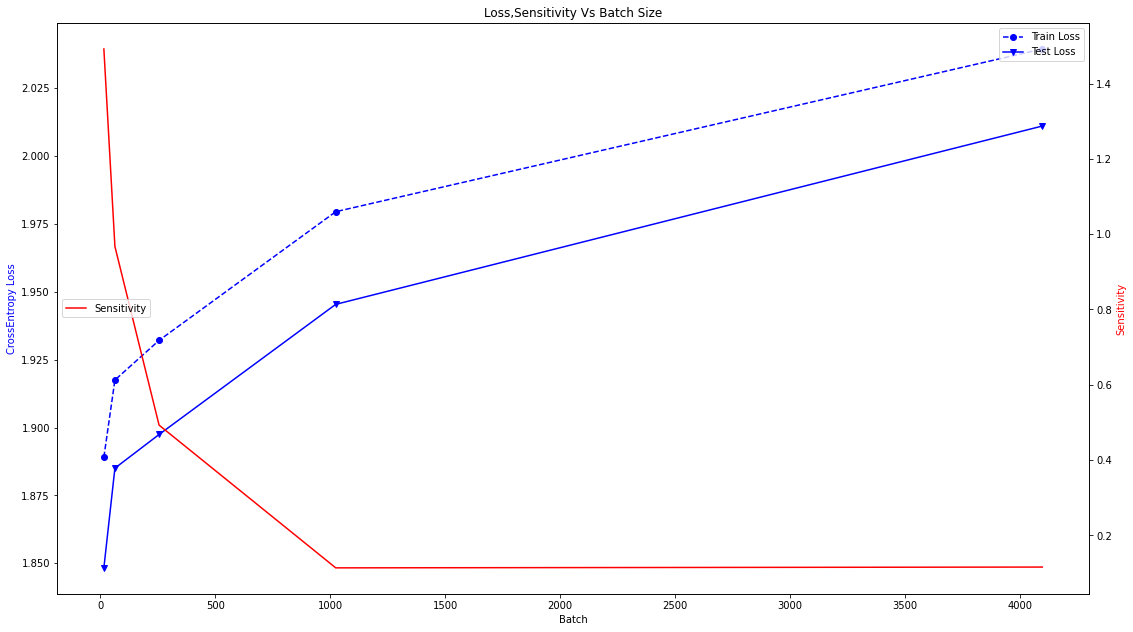

In [19]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(batch_sizes,best_model_train_loss,color="Blue", marker="o",linestyle='dashed')
ax.plot(batch_sizes,best_model_test_loss,color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="upper right")
ax.set_xlabel("Batch",color="Black")
# ax.set_xscale('log')
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("Loss,Sensitivity Vs Batch Size",color="black")

ax2=ax.twinx()
ax2.plot(batch_sizes,best_model_sensitivity,color="red")
ax2.set_xlabel("Batch",color="Black")
ax2.set_ylabel("Sensitivity",color = "red")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()
fig.savefig(result_folder+'HW3_2_batch_all_loss_sensitivity.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


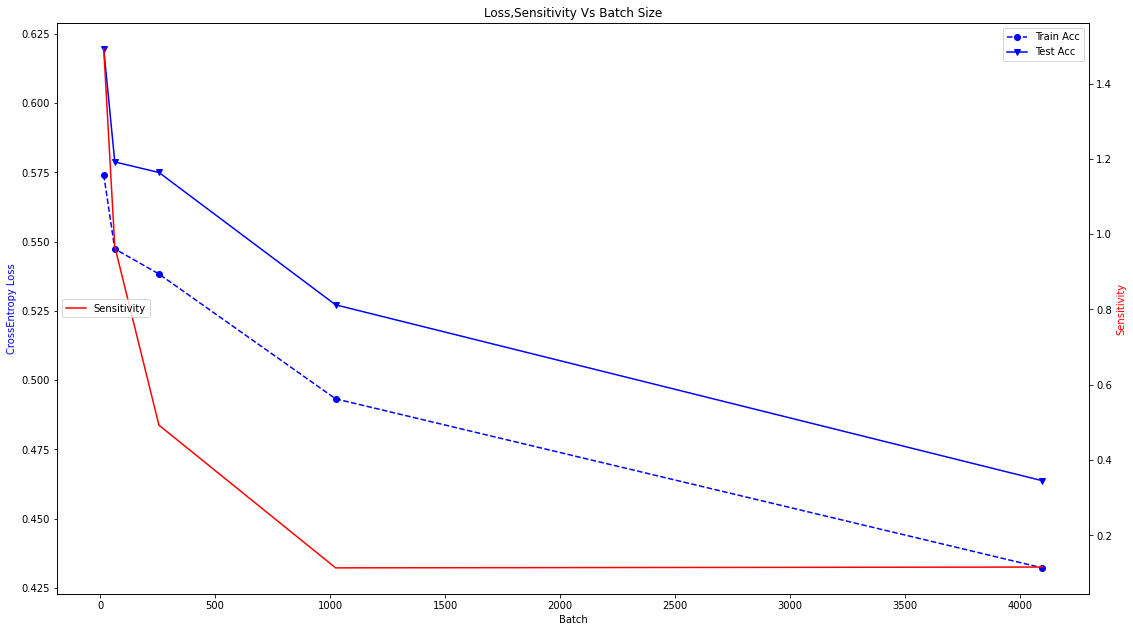

In [20]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(batch_sizes,best_model_train_acc,color="Blue", marker="o",linestyle='dashed')
ax.plot(batch_sizes,best_model_test_acc,color="Blue", marker="v")
ax.legend(['Train Acc','Test Acc'],loc="upper right")
ax.set_xlabel("Batch",color="Black")
# ax.set_xscale('log')
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("Loss,Sensitivity Vs Batch Size",color="black")

ax2=ax.twinx()
ax2.plot(batch_sizes,best_model_sensitivity,color="red")
ax2.set_xlabel("Batch",color="Black")
ax2.set_ylabel("Sensitivity",color = "red")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()
fig.savefig(result_folder+'HW3_2_batch_all_acc_sensitivity.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
